In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('weather_data.csv')

In [3]:
ds

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,1,26.0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,1
1,2006-04-01 01:00:00.000 +0200,1,26.0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,1
2,2006-04-01 02:00:00.000 +0200,2,26.0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,1
3,2006-04-01 03:00:00.000 +0200,1,26.0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,1
4,2006-04-01 04:00:00.000 +0200,2,26.0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96376,2016-09-09 19:00:00.000 +0200,1,26.0,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,1
96377,2016-09-09 20:00:00.000 +0200,1,26.0,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,1
96378,2016-09-09 21:00:00.000 +0200,1,26.0,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,1
96379,2016-09-09 22:00:00.000 +0200,1,26.0,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,1


<AxesSubplot:>

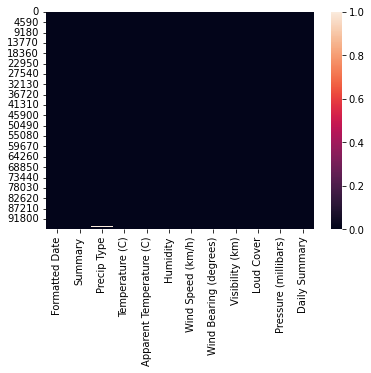

In [4]:
sns.heatmap(ds.isnull())


<AxesSubplot:>

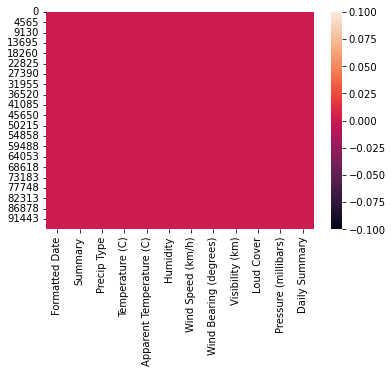

In [5]:
ds1=ds.dropna()
sns.heatmap(ds1.isnull())

In [6]:
#predict
#x=ds1[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']].values #iloc[:,:-1].values
#y=ds1[['RainTomorrow']].values

#weather_data.csv
x=ds1[['Summary','Precip Type','Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)']].values
y=ds1[['Daily Summary']].values


#seattle-weather.csv
#x=ds1[['precipitation','temp_max','temp_min','wind']].values 
#y=ds1[['weather']].values

In [7]:
from sklearn.model_selection import train_test_split
#from sklearn import datasets
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import LinearSVC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [8]:
print("no of rows,column",x.shape)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

no of rows,column (95864, 10)
x_train (67104, 10)
x_test (28760, 10)
y_train (67104, 1)
y_test (28760, 1)


In [9]:
from sklearn.svm import SVC
classifier= SVC(kernel='linear')

In [ ]:
classifier.fit(x_train,y_train)

E:\SOFTWARE\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
classifier.score(x_test, y_test)*100

In [ ]:
y_predict=classifier.predict(x_test)

In [ ]:
y_test=y_test.reshape(-1,1)
y_pred=y_predict.reshape(-1,1)


In [ ]:
df=np.concatenate((y_test,y_pred),axis=1)
dataframe=pd.DataFrame(df,columns=['current weather','prediction of weather'])


In [ ]:
dataframe

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm=confusion_matrix(y_test,y_predict)


In [ ]:
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("true")